# Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
df = pd.read_csv("Superstore.csv", encoding="ISO-8859-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


---

# Geographic Market Analysis

## Number of Orders per Each State

In [3]:
state = df['State'].value_counts().reset_index()
state.columns = ['State', 'count']
state

,State,count
0,California,2001
1,New York,1128
2,Texas,985
3,Pennsylvania,587
4,Washington,506
5,Illinois,492
6,Ohio,469
7,Florida,383
8,Michigan,255
9,North Carolina,249


## Total Sales per Each State

In [17]:
state_sales = df.groupby('State')['Sales'].sum().reset_index()
state_sales.columns = ['State', 'Total Sales']
state_sales = state_sales.sort_values(by='Total Sales', ascending=False)
print(state_sales)

                   State  Total Sales
3             California  457687.6315
30              New York  310876.2710
41                 Texas  170188.0458
45            Washington  138641.2700
36          Pennsylvania  116511.9140
8                Florida   89473.7080
11              Illinois   80166.1010
33                  Ohio   78258.1360
20              Michigan   76269.6140
44              Virginia   70636.7200
31        North Carolina   55603.1640
12               Indiana   53555.3600
9                Georgia   49095.8400
15              Kentucky   36591.7500
28            New Jersey   35764.3120
1                Arizona   35282.0010
47             Wisconsin   32114.6100
4               Colorado   32108.1180
40             Tennessee   30661.8730
21             Minnesota   29863.1500
19         Massachusetts   28634.4340
6               Delaware   27451.0690
18              Maryland   23705.5230
37          Rhode Island   22627.9560
23              Missouri   22205.1500
34          

## Visualizing Total Sales per Each State

C:\Users\Makrious\AppData\Local\Temp\ipykernel_13504\1637100292.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_sales.head(20), x='Total Sales', y='State', palette='viridis', legend=False)


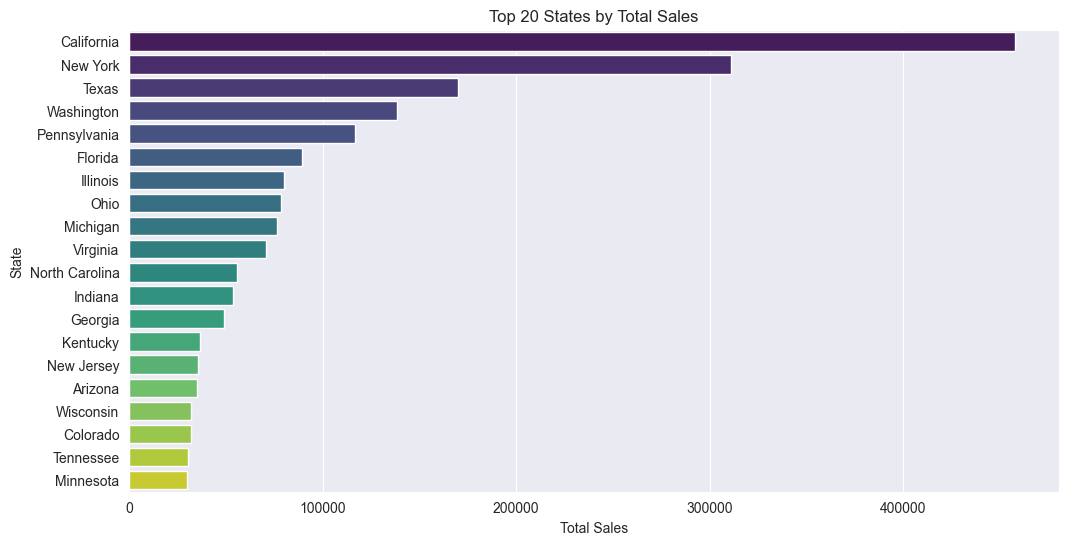

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(data=state_sales.head(20), x='Total Sales', y='State', palette='viridis', legend=False)
plt.title('Top 20 States by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('State')
plt.show()

In [23]:
import plotly.express as px

fig = px.treemap(state_sales, path=['State'], values='Total Sales',
                 color='Total Sales', color_continuous_scale='YlGnBu',
                 title='Total Sales by State')
fig.show()

## Number of Orders per Each City

In [4]:
city = df['City'].value_counts().reset_index()
city.columns = ['City', 'count']
city

,City,count
0,New York City,915
1,Los Angeles,747
2,Philadelphia,537
3,San Francisco,510
4,Seattle,428
...,...,...
526,Abilene,1
527,Montebello,1
528,Kissimmee,1
529,Danbury,1


## Total Sales per Each City

In [18]:
city_sales = df.groupby('City')['Sales'].sum().reset_index()
city_sales.columns = ['City', 'Total Sales']
city_sales = city_sales.sort_values(by='Total Sales', ascending=False)
print(city_sales)

              City  Total Sales
329  New York City   256368.161
266    Los Angeles   175851.341
452        Seattle   119540.742
438  San Francisco   112669.092
374   Philadelphia   109077.013
..             ...          ...
354   Ormond Beach        2.808
370      Pensacola        2.214
221        Jupiter        2.064
140         Elyria        1.824
1          Abilene        1.392

[531 rows x 2 columns]


## Visualizing Total Sales per Each City

C:\Users\Makrious\AppData\Local\Temp\ipykernel_13504\137177410.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




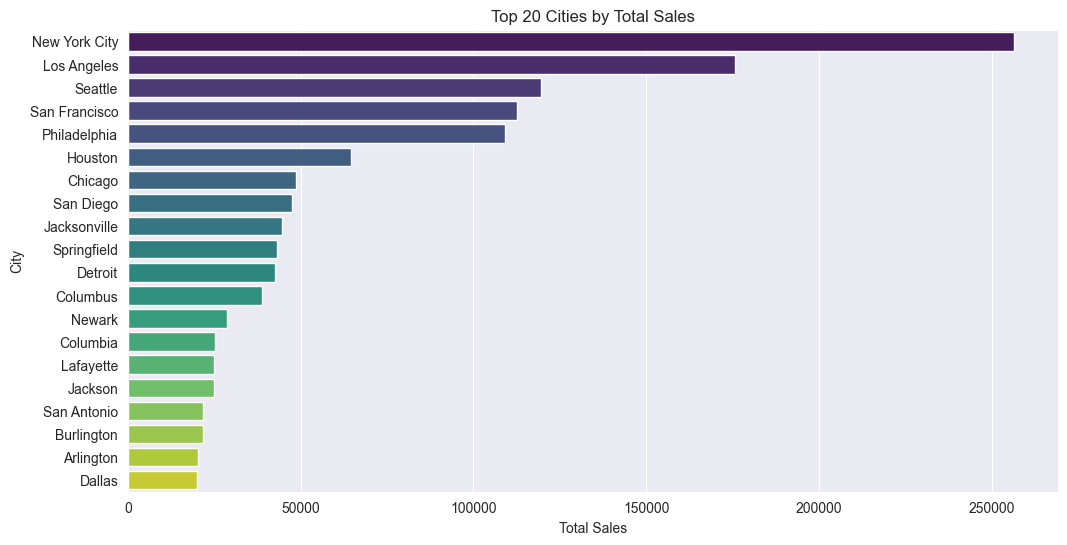

In [24]:
top_cities = city_sales.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_cities, x='Total Sales', y='City', palette='viridis')
plt.title('Top 20 Cities by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('City')
plt.show()

In [26]:
fig = px.treemap(city_sales.head(50), path=['City'], values='Total Sales',
                 color='Total Sales', color_continuous_scale='YlGnBu',
                 title='Top Cities by Total Sales')
fig.show()

---